<a href="https://colab.research.google.com/github/gabrielcz6/supermarketsalesanalysis/blob/main/supermarketanalisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Variables**

In [31]:
df_ventas, df_ventas_limpio="",""

**Librerías**

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

**Obtención de Datos**

Obtención de datos

Crea una función obtencion_datos(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Obtención de los datos: Con la ayuda del método read_csv carga tu archivo "reporte_ventas.csv" dentro de la variable global df_ventas.

Formatar columnas de fechas: Con la ayuda del método pd.to_datetime transforma las columnas 'fecha_pedido' y 'fecha_envio' que se encuentran como_ texto a formato datetime_ usando el siguiente formato format='%Y-%m-%d'.

Elimina Repetidos: Elimina todos los registros duplicados con el método drop_duplicates() y guarda el resultado en la variable global df_ventas_limpio.

Elimina filas con registros de prueba de la base: Elimina todos los registros cuyo valor sea igual a 'prueba' en la columna 'nombre_cliente', continúa guardando el resultado en df_ventas_limpio.

Elimina filas con valor nulo en la columna nombre_cliente: Elimina todos los registros cuyo valor sea nulo en la columna 'nombre_cliente', continúa guardando el resultado en df_ventas_limpio.

Filtra operaciones sin ganancia: Quédate sólo con los registros que tengan un valor mayor a cero en la columna 'total_ganancia', continúa guardando el resultado en df_ventas_limpio.

Actualiza el indice: Utilizando el método reset_index actualiza el índice del dataframe final df_ventas_limpio.



In [33]:
def obtencion_datos():
    global df_ventas
    df_ventas = pd.read_csv("reporte_ventas.csv")
    print("Datos obtenidos:")
    print(df_ventas.head())

def formatear_columnas_fechas():
    global df_ventas
    df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
    df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')
    print("Columnas de fechas formateadas:")
    print(df_ventas.head())

def eliminar_repetidos():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas.drop_duplicates()
    print("Repetidos eliminados:")
    print(df_ventas_limpio.head())

def eliminar_filas():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] != 'prueba']
    print("Filas con 'prueba' eliminadas:")
    print(df_ventas_limpio.head())

def eliminar_registros_nulos():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio.dropna(subset=['nombre_cliente'])
    print("Registros nulos eliminados:")
    print(df_ventas_limpio.head())

def filtrar_operaciones_con_ganancia():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['total_ganancia'] > 0]
    print("Operaciones sin ganancia filtradas:")
    print(df_ventas_limpio.head())

def resetear_indice():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio.reset_index(drop=True)
    print("Índice reseteado:")
    print(df_ventas_limpio.head())

obtencion_datos()
formatear_columnas_fechas()
eliminar_repetidos()
eliminar_filas()
eliminar_registros_nulos()
filtrar_operaciones_con_ganancia()
resetear_indice()

print('Información')
print(df_ventas.info())
print('------------')
print('Duplicados:')
print(df_ventas.duplicated().sum())
print('------------')
print('Registros de prueba:')
print((df_ventas['nombre_cliente'] == 'prueba').sum())
print('------------')
print('Registros con ganancia <=0:')
print((df_ventas['total_ganancia'] <= 0).sum())


obtencion_datos()
print('información:')
print(df_ventas_limpio.info())
print('------------')
print(df_ventas_limpio.duplicated().sum())
print('------------')
print('registros de prueba:')
print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum ())
print('------------')
print('registros con ganancia <=0:')
print((df_ventas_limpio['total_ganancia'] <= 0).sum ())


Datos obtenidos:
  fecha_pedido fecha_envio        modo_envio     nombre_cliente  \
0   2021-11-09  2021-11-12         Económico    Thiago Silveira   
1   2021-11-09  2021-11-12         Económico    Thiago Silveira   
2   2021-06-13  2021-06-17         Económico      Giovanna Lima   
3   2020-10-12  2020-10-19  Entrega estándar  Ana Júlia da Cruz   
4   2020-10-12  2020-10-19  Entrega estándar  Ana Júlia da Cruz   

  segmento_cliente          ciudad          estado   region  \
0              B2C  Ribeirão Preto       São Paulo  Sureste   
1              B2C  Ribeirão Preto       São Paulo  Sureste   
2              B2B  Rio de Janeiro  Rio de Janeiro  Sureste   
3              B2C   Foz do Iguaçu          Paraná      Sur   
4              B2C   Foz do Iguaçu          Paraná      Sur   

   departamento_producto             tipo_producto  precio_base  \
0                   Ropa                 Camisetas       409.70   
1                   Ropa                     Jeans       705.10   


**Pregunta 1**

    año  total_venta
0  2019   1052735.86
1  2020   1190541.40
2  2021   1535801.44
3  2022   1825927.50


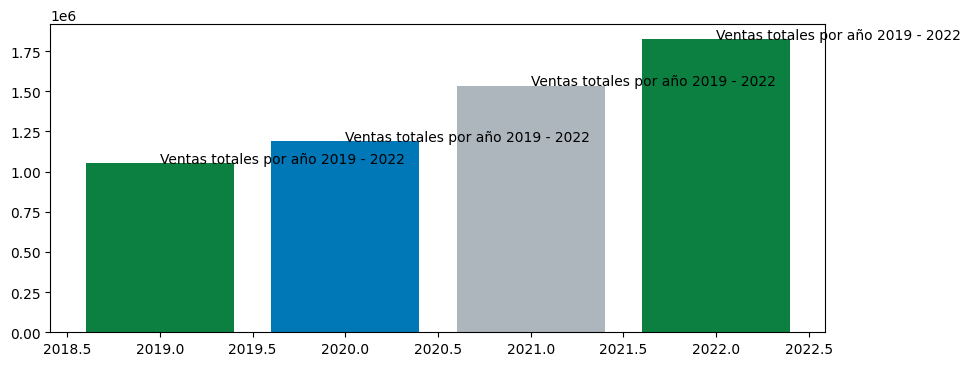

In [53]:
def pregunta_1():
    global df_ventas
    global df_ventas_año
    global df_ventas_limpio
    global df_ventas_año_agrupado

    df_ventas_año=df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()

   # Crea una nueva columna llamada 'año' con el año de 'fecha_pedido'
    df_ventas_año['año'] = df_ventas_año['fecha_pedido'].dt.year

    # Elimina la columna 'fecha_pedido'
    df_ventas_año = df_ventas_año.drop('fecha_pedido', axis=1)

    # Muestra el DataFrame resultante
    #print(df_ventas_año)

    df_ventas_año_agrupado = df_ventas_año.groupby('año').aggregate({'total_venta': 'sum'}).reset_index()

    # Muestra el DataFrame resultante
    print(df_ventas_año_agrupado)
    fig, ax = plt.subplots(figsize=(10,4))
    ax.bar(df_ventas_año_agrupado["año"], df_ventas_año_agrupado["total_venta"], color=colores, width=0.8)
    for bar in ax.patches:
      valor = bar.get_height()
      qtd = "Ventas totales por año 2019 - 2022"
      ax.text(bar.get_x() + bar.get_width() / 2.0, valor, qtd)

pregunta_1()

**Pregunta 2**

In [35]:
def pregunta_2():
    global df_ventas_limpio
    global df_top_ganancias

    # Crear una copia de df_ventas_limpio con solo las columnas 'tipo_producto' y 'total_ganancia'
    df_top_ganancias = df_ventas_limpio[['tipo_producto', 'total_ganancia']].copy()

    # Agrupar por 'tipo_producto', sumarizar 'total_ganancia' y ordenar los resultados
    df_top_ganancias = df_top_ganancias.groupby('tipo_producto').aggregate({'total_ganancia': 'sum'}).sort_values('total_ganancia', ascending=False)

    # Seleccionar los primeros 7 registros
    df_top_ganancias = df_top_ganancias.head(7)


pregunta_2()

print(df_top_ganancias)

                       total_ganancia
tipo_producto                        
Lámparas LED                111453.41
Laptops                      91148.67
Cámaras digitales            80192.63
Smartphones                  64705.58
Jeans                        55982.95
Detergente para ropas        55766.39
Bolsas de basura             53328.46


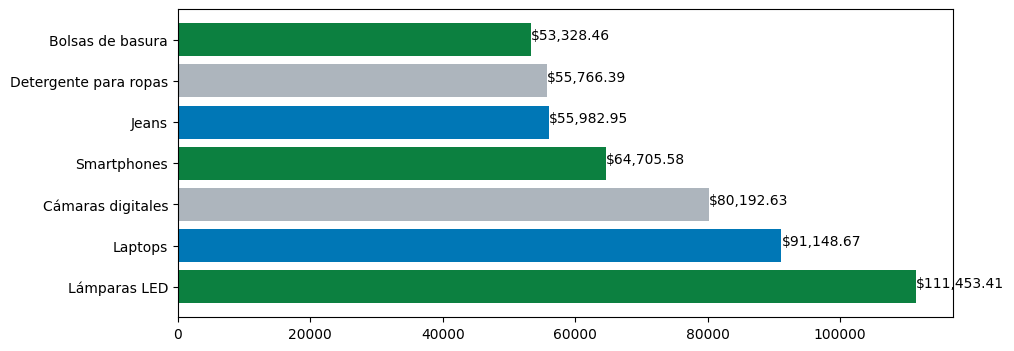

In [36]:
# Colores para las barras
colores = ['#0C8040', '#0077b6', '#adb5bd', '#0C8040', '#0077b6', '#adb5bd', '#0C8040']

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 4))

# Crear el gráfico de barras horizontal
ax.barh(df_top_ganancias.index, df_top_ganancias['total_ganancia'], color=colores, align='center')

# Colocar los valores sobre cada barra
for i, valor in enumerate(df_top_ganancias['total_ganancia']):
    qtd = f'${valor:,.2f}'  # Formatea el valor como texto con símbolo de dólar y dos decimales
    ax.text(valor, i, qtd)

# Mostrar el gráfico
plt.show()